# Sudoku Performance Analysis
This project analyzes the performance of Sudoku games played by the user, focusing on completion time, win rates, and the difficulty levels. The goal is to understand how the player's win rate varies across different difficulty levels and over time, as well as the relationship between the time spent completing the puzzle and the win rate.


## Project Objective
The objective of this project is to:
- Analyze the win rates and completion times for easy and hard Sudoku puzzles.
- Investigate whether there is a correlation between time spent on a puzzle and the success rate.
- Examine how win rates change over time.


## Data Source  
- The data will be manually recorded from a Sudoku mobile application. Each day, data will be collected separately for **Easy and Hard** difficulty levels. The key metrics that will be tracked are:  
  - Number of games played per day (Easy & Hard)  
  - Win rate (%) (Easy & Hard)  
  - Number of error-free (perfect) wins (Easy & Hard)  
  - Fastest completion time (Easy & Hard)  
  - Average completion time (Easy & Hard)  
  - Winning streaks (Easy & Hard)  


## Data Collection Plan  
Data will be recorded daily in a **CSV file**. Below is the sample data:  

| Date       | Easy Games | Easy Win Rate | Easy Perfect Wins | Easy Fastest Time | Easy Average Time | Easy Winning Streak | Hard Games | Hard Win Rate | Hard Perfect Wins | Hard Fastest Time | Hard Average Time | Hard Winning Streak |
|------------|------------|---------------|--------------------|-------------------|-------------------|---------------------|------------|---------------|--------------------|-------------------|-------------------|---------------------|
| 2025-03-10 | 4          | 90%           | 3                  | 3.2               | 4.5               | 5                   | 2          | 70%           | 1                  | 5.8               | 7.3               | 2                   |
| 2025-03-11 | 5          | 85%           | 2                  | 3.0               | 4.8               | 4                   | 3          | 65%           | 1                  | 6.2               | 8.0               | 1                   |


## Exploratory Data Analysis (EDA)

Before performing any hypothesis testing, an exploratory data analysis (EDA) was performed to better understand the dataset's structure and key characteristics. EDA helps in identifying patterns, detecting anomalies, and ensuring the integrity of the data. Here’s what was done:

### 1. General Overview of the Data
I checked the basic statistics and the data types to understand the distribution of variables:
- Shape: Number of rows and columns
- Summary statistics like mean, standard deviation, and percentiles.
- These summary statistics helps us to comment at first glance. It is seen that:

**mean time for easy games:** 4.16

**mean time for hard games:** 8.43

**std for easy games:** 0.81

**std for hard games:** 0.74

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, linregress, pearsonr

df = pd.read_csv('sudoku_performance.csv')

# Süreyi dakika cinsine çeviren fonksiyon
def zamanduzelt(t):
    minutes, seconds = map(int, t.split(":"))
    return minutes + seconds / 60

# Süre sütunlarını dönüştür
df["Easy Time"] = df["Easy Avg Time (min)"].apply(zamanduzelt)
df["Hard Time"] = df["Hard Avg Time (min)"].apply(zamanduzelt)

#istatistikler
print("Easy Time Summary:\n", df["Easy Time"].describe())
print("Hard Time Summary:\n", df["Hard Time"].describe())

Easy Time Summary:
 count    66.000000
mean      4.155808
std       0.811074
min       2.616667
25%       3.412500
50%       4.166667
75%       4.916667
max       5.700000
Name: Easy Time, dtype: float64
Hard Time Summary:
 count    66.000000
mean      8.425000
std       0.740889
min       7.250000
25%       7.787500
50%       8.450000
75%       8.954167
max      11.166667
Name: Hard Time, dtype: float64


### 2. Handling Missing Data
We found minimal missing data and filled missing values using mean imputation for the columns with sparse missing data.

### 3. Distribution and Visualization
Histograms were used to visualize the distribution of win rates and completion times. Both win rate histograms give valuable insight into the difficulty levels. The easy puzzle distribution being narrow shows consistency in performance, while the hard puzzle distribution's spread shows the challenge they present.

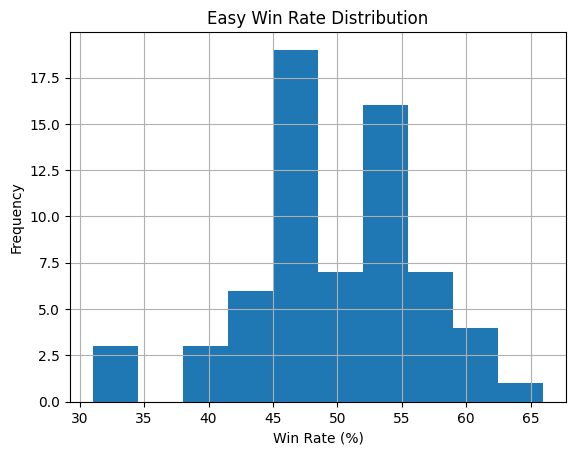

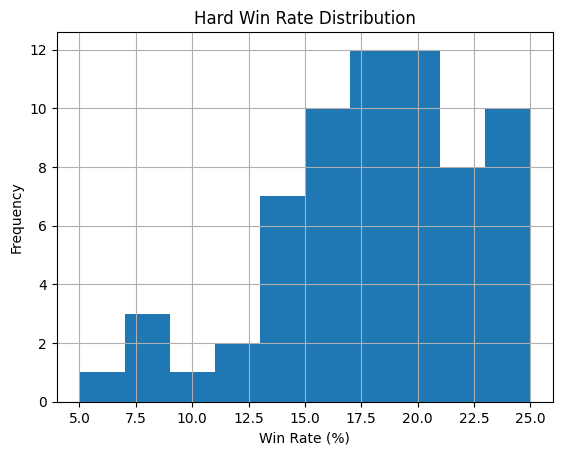

In [2]:
# easy win rate histogram
df['Easy Win Rate (%)'].hist(bins=10)
plt.title('Easy Win Rate Distribution')
plt.xlabel('Win Rate (%)')
plt.ylabel('Frequency')
plt.savefig("histogram_easy2.png", dpi=300)
plt.show()

# hard win rate histogram
df['Hard Win Rate (%)'].hist(bins=10)
plt.title('Hard Win Rate Distribution')
plt.xlabel('Win Rate (%)')
plt.ylabel('Frequency')
plt.savefig("histogram_hard2.png", dpi=300)
plt.show()


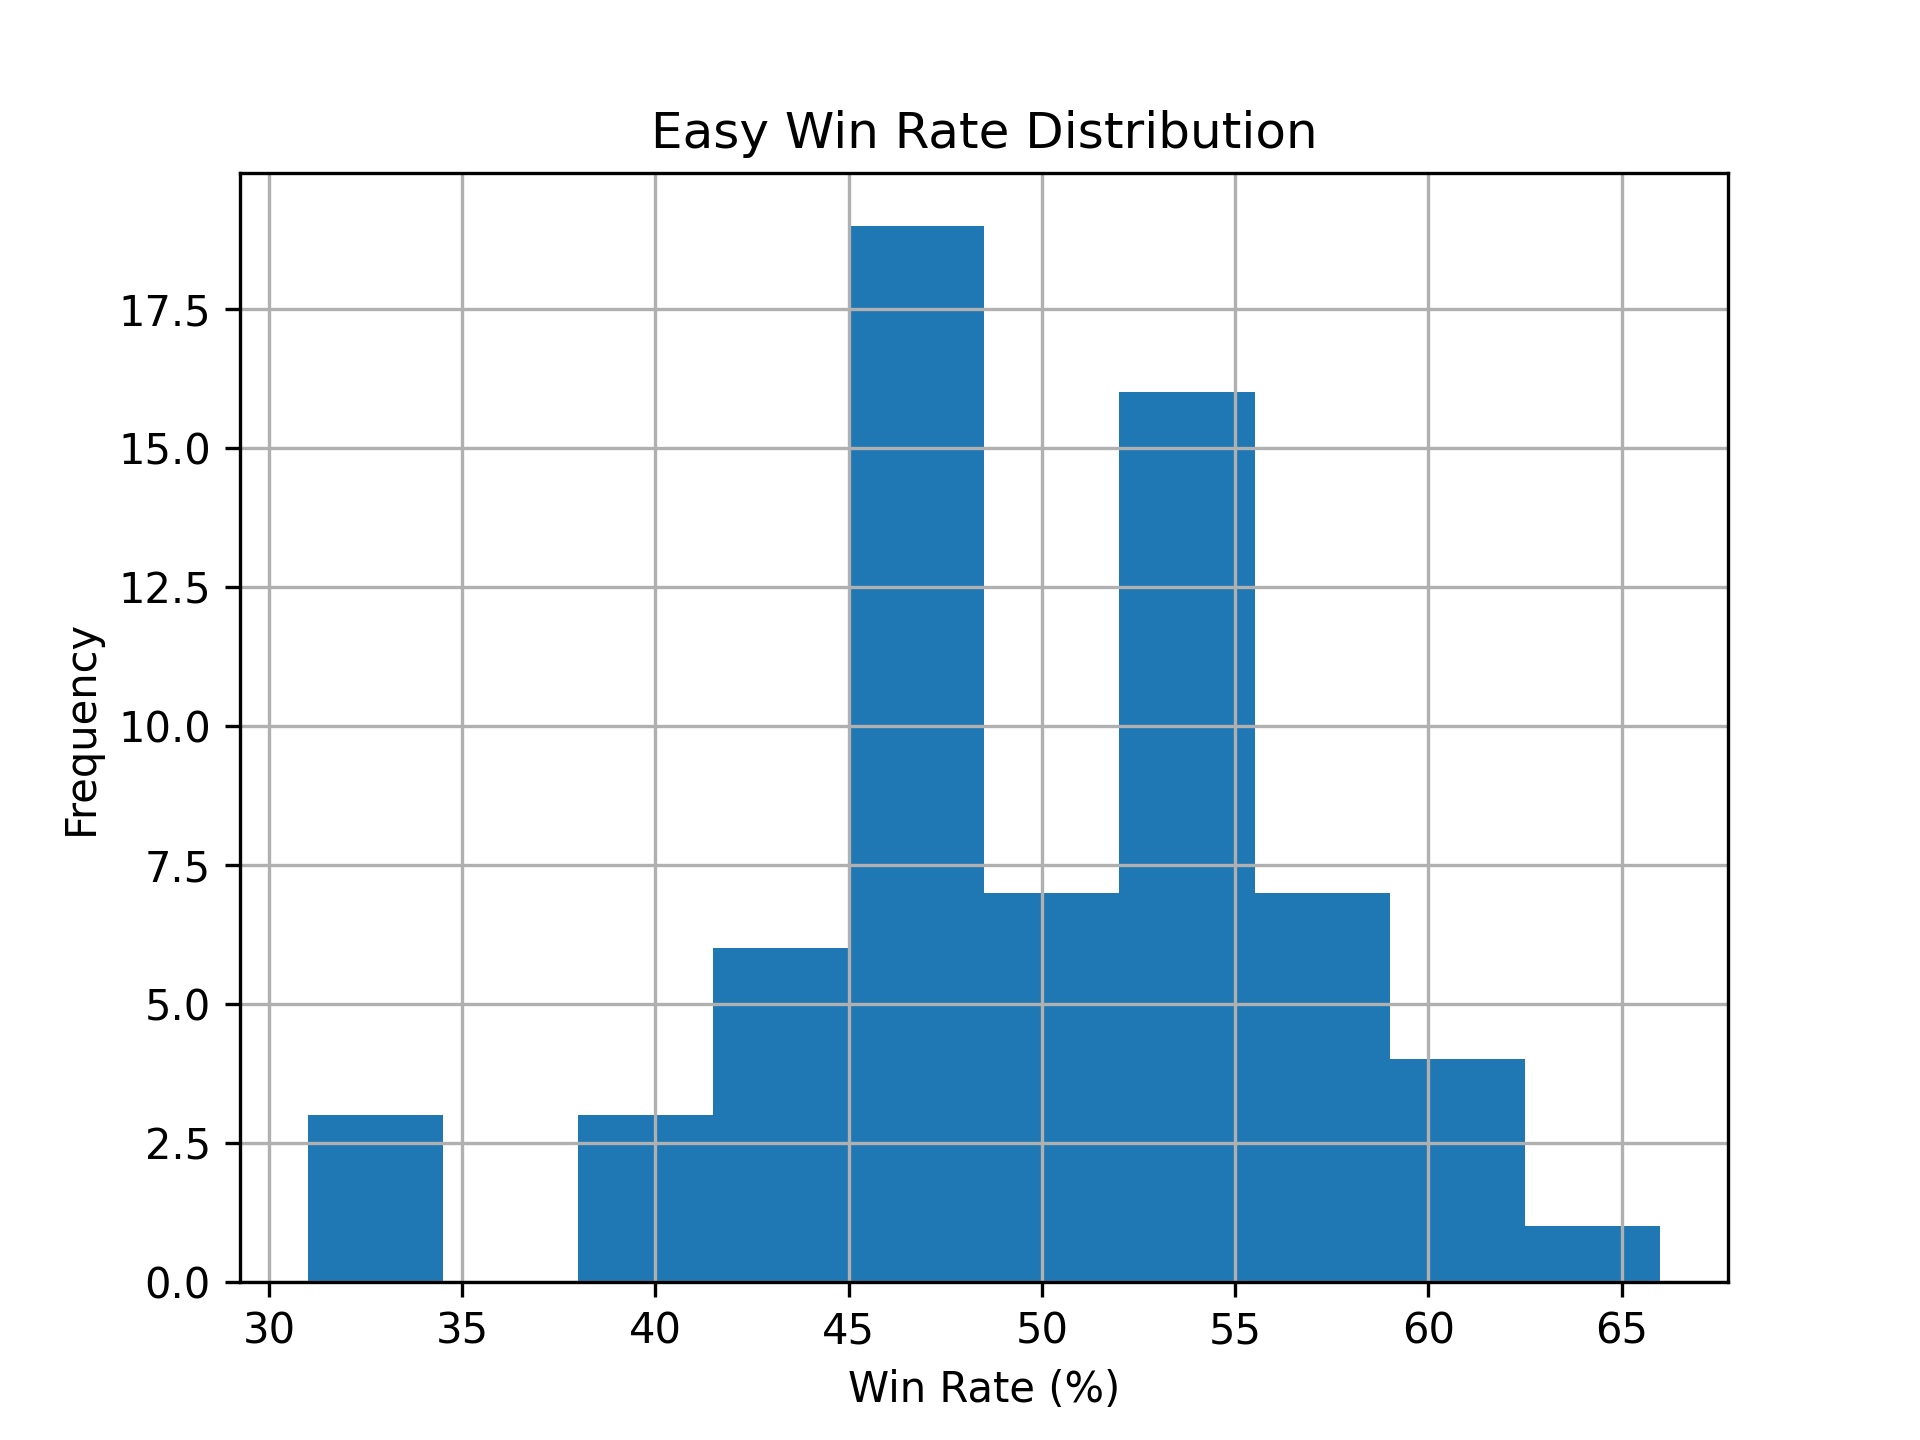


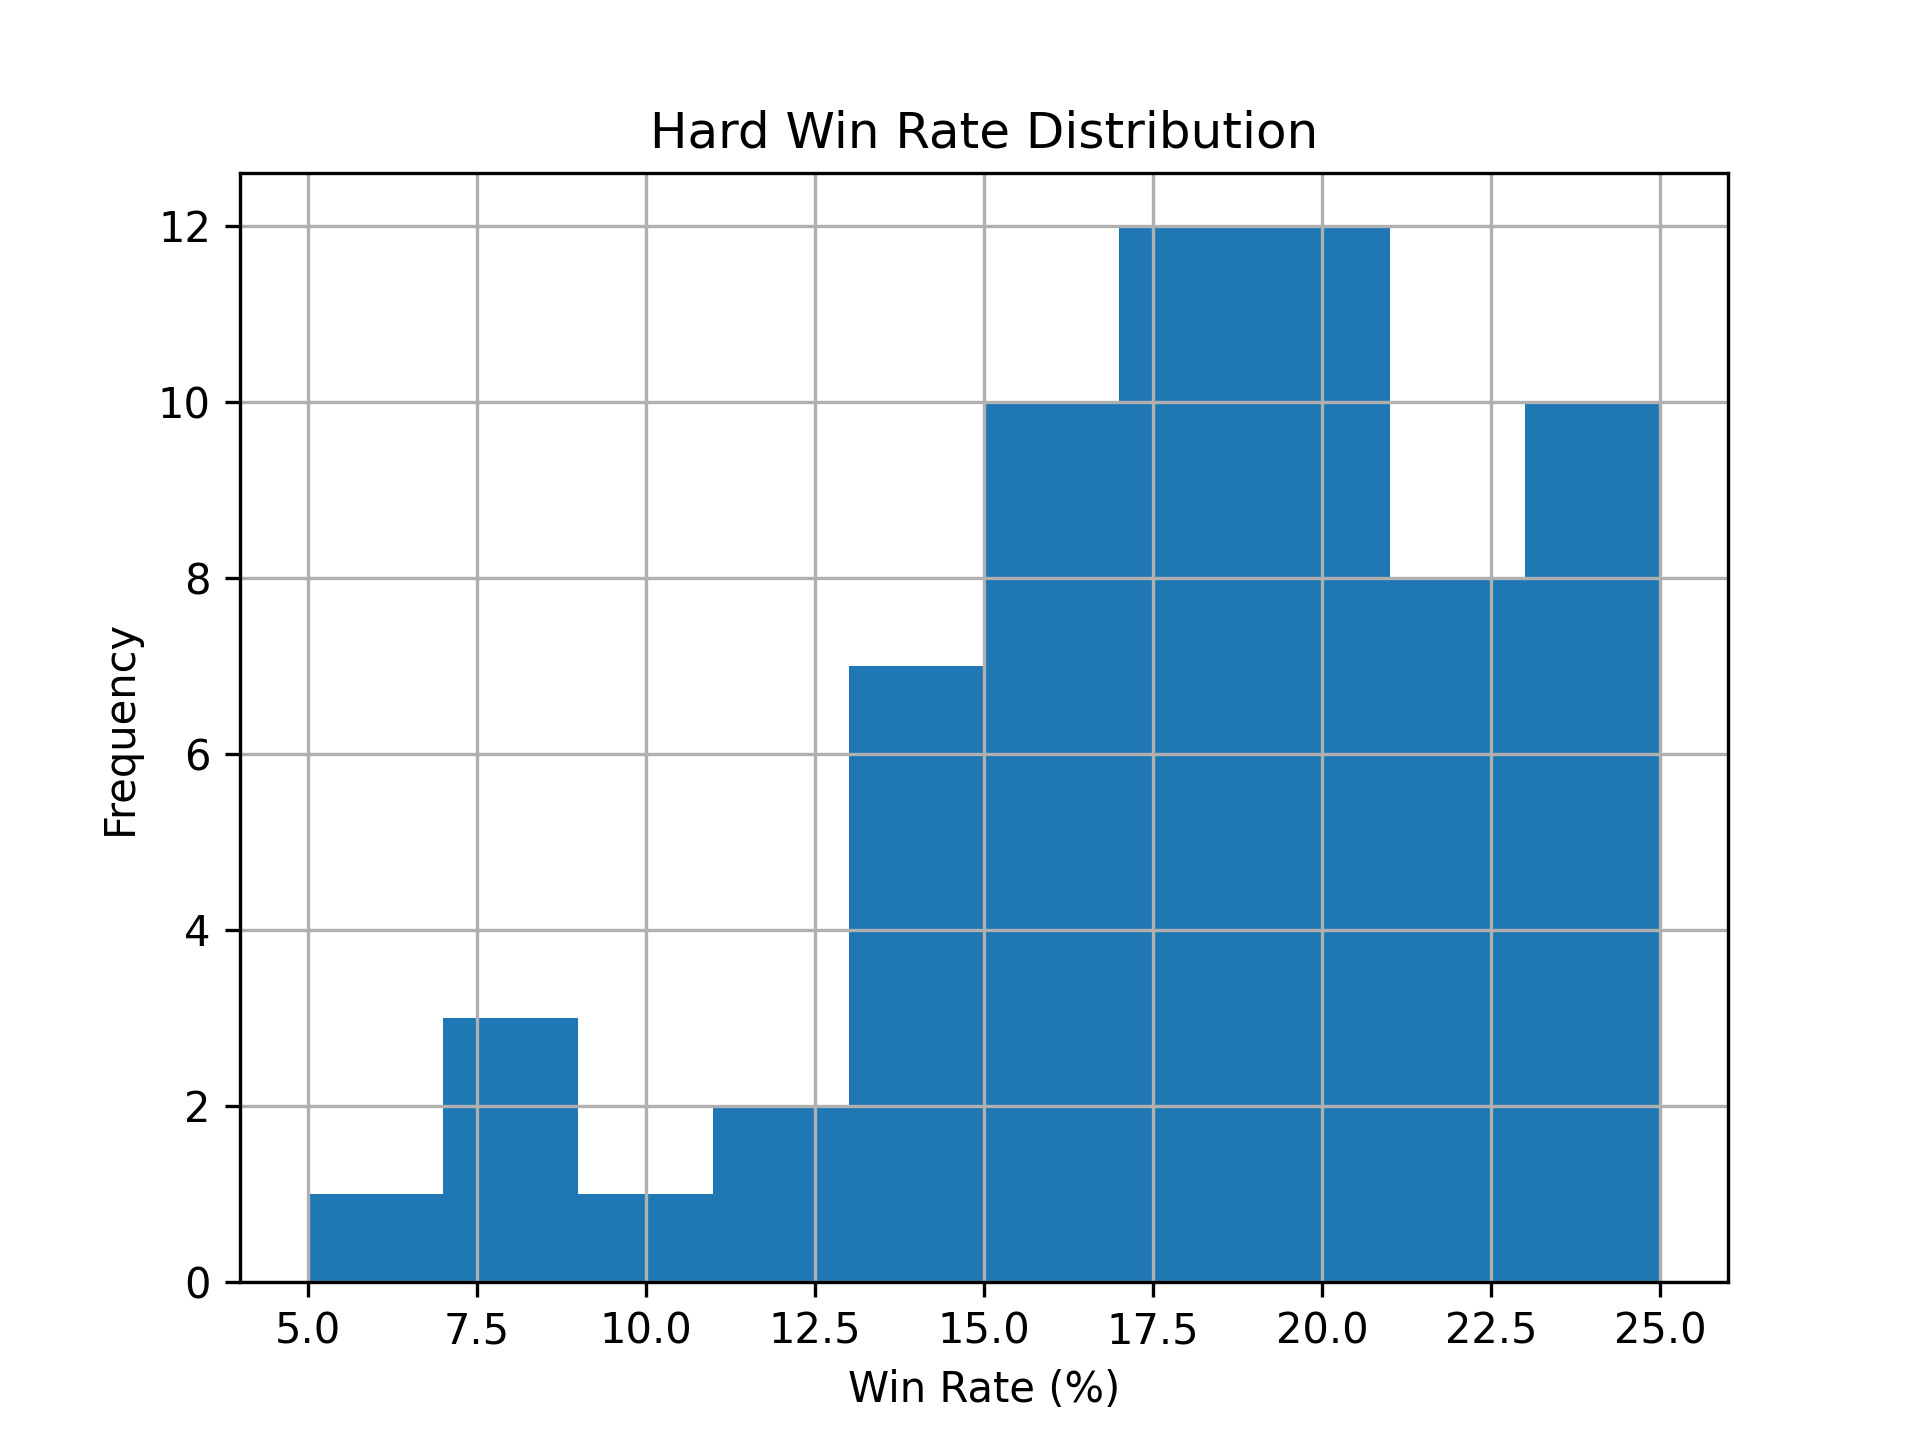

### 4. Identifying Outliers
Boxplots were created to check for any potential outliers in the data. An outlier is found from hard average completion time data. This indicates that on at least one occasion, the player took significantly longer than usual to complete a hard-level puzzle, which may point to a lapse in performance or an unusually difficult puzzle.

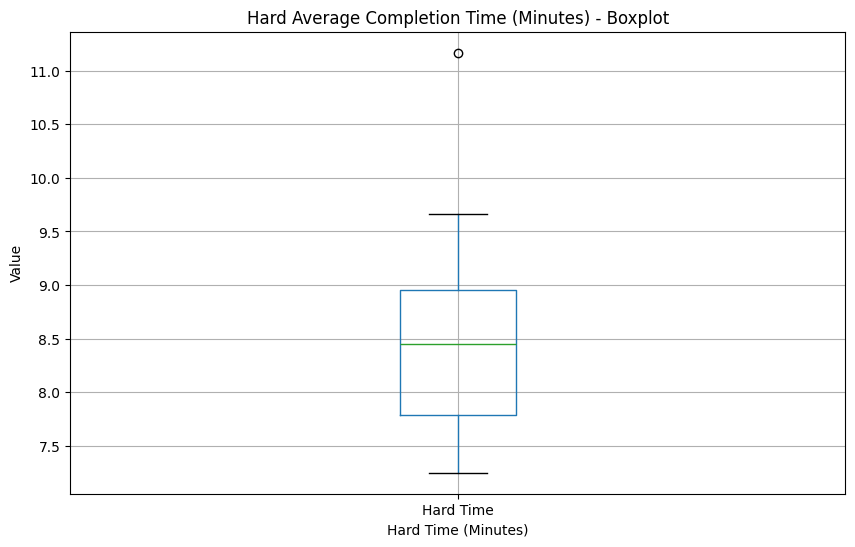

In [3]:
# Boxplot
plt.figure(figsize=(10, 6))
df.boxplot(column='Hard Time', showfliers=True)
plt.title('Hard Average Completion Time (Minutes) - Boxplot')
plt.xlabel('Hard Time (Minutes)')
plt.ylabel('Value')
plt.grid(True)
plt.savefig('outlier_hard.png', dpi=300)
plt.show()

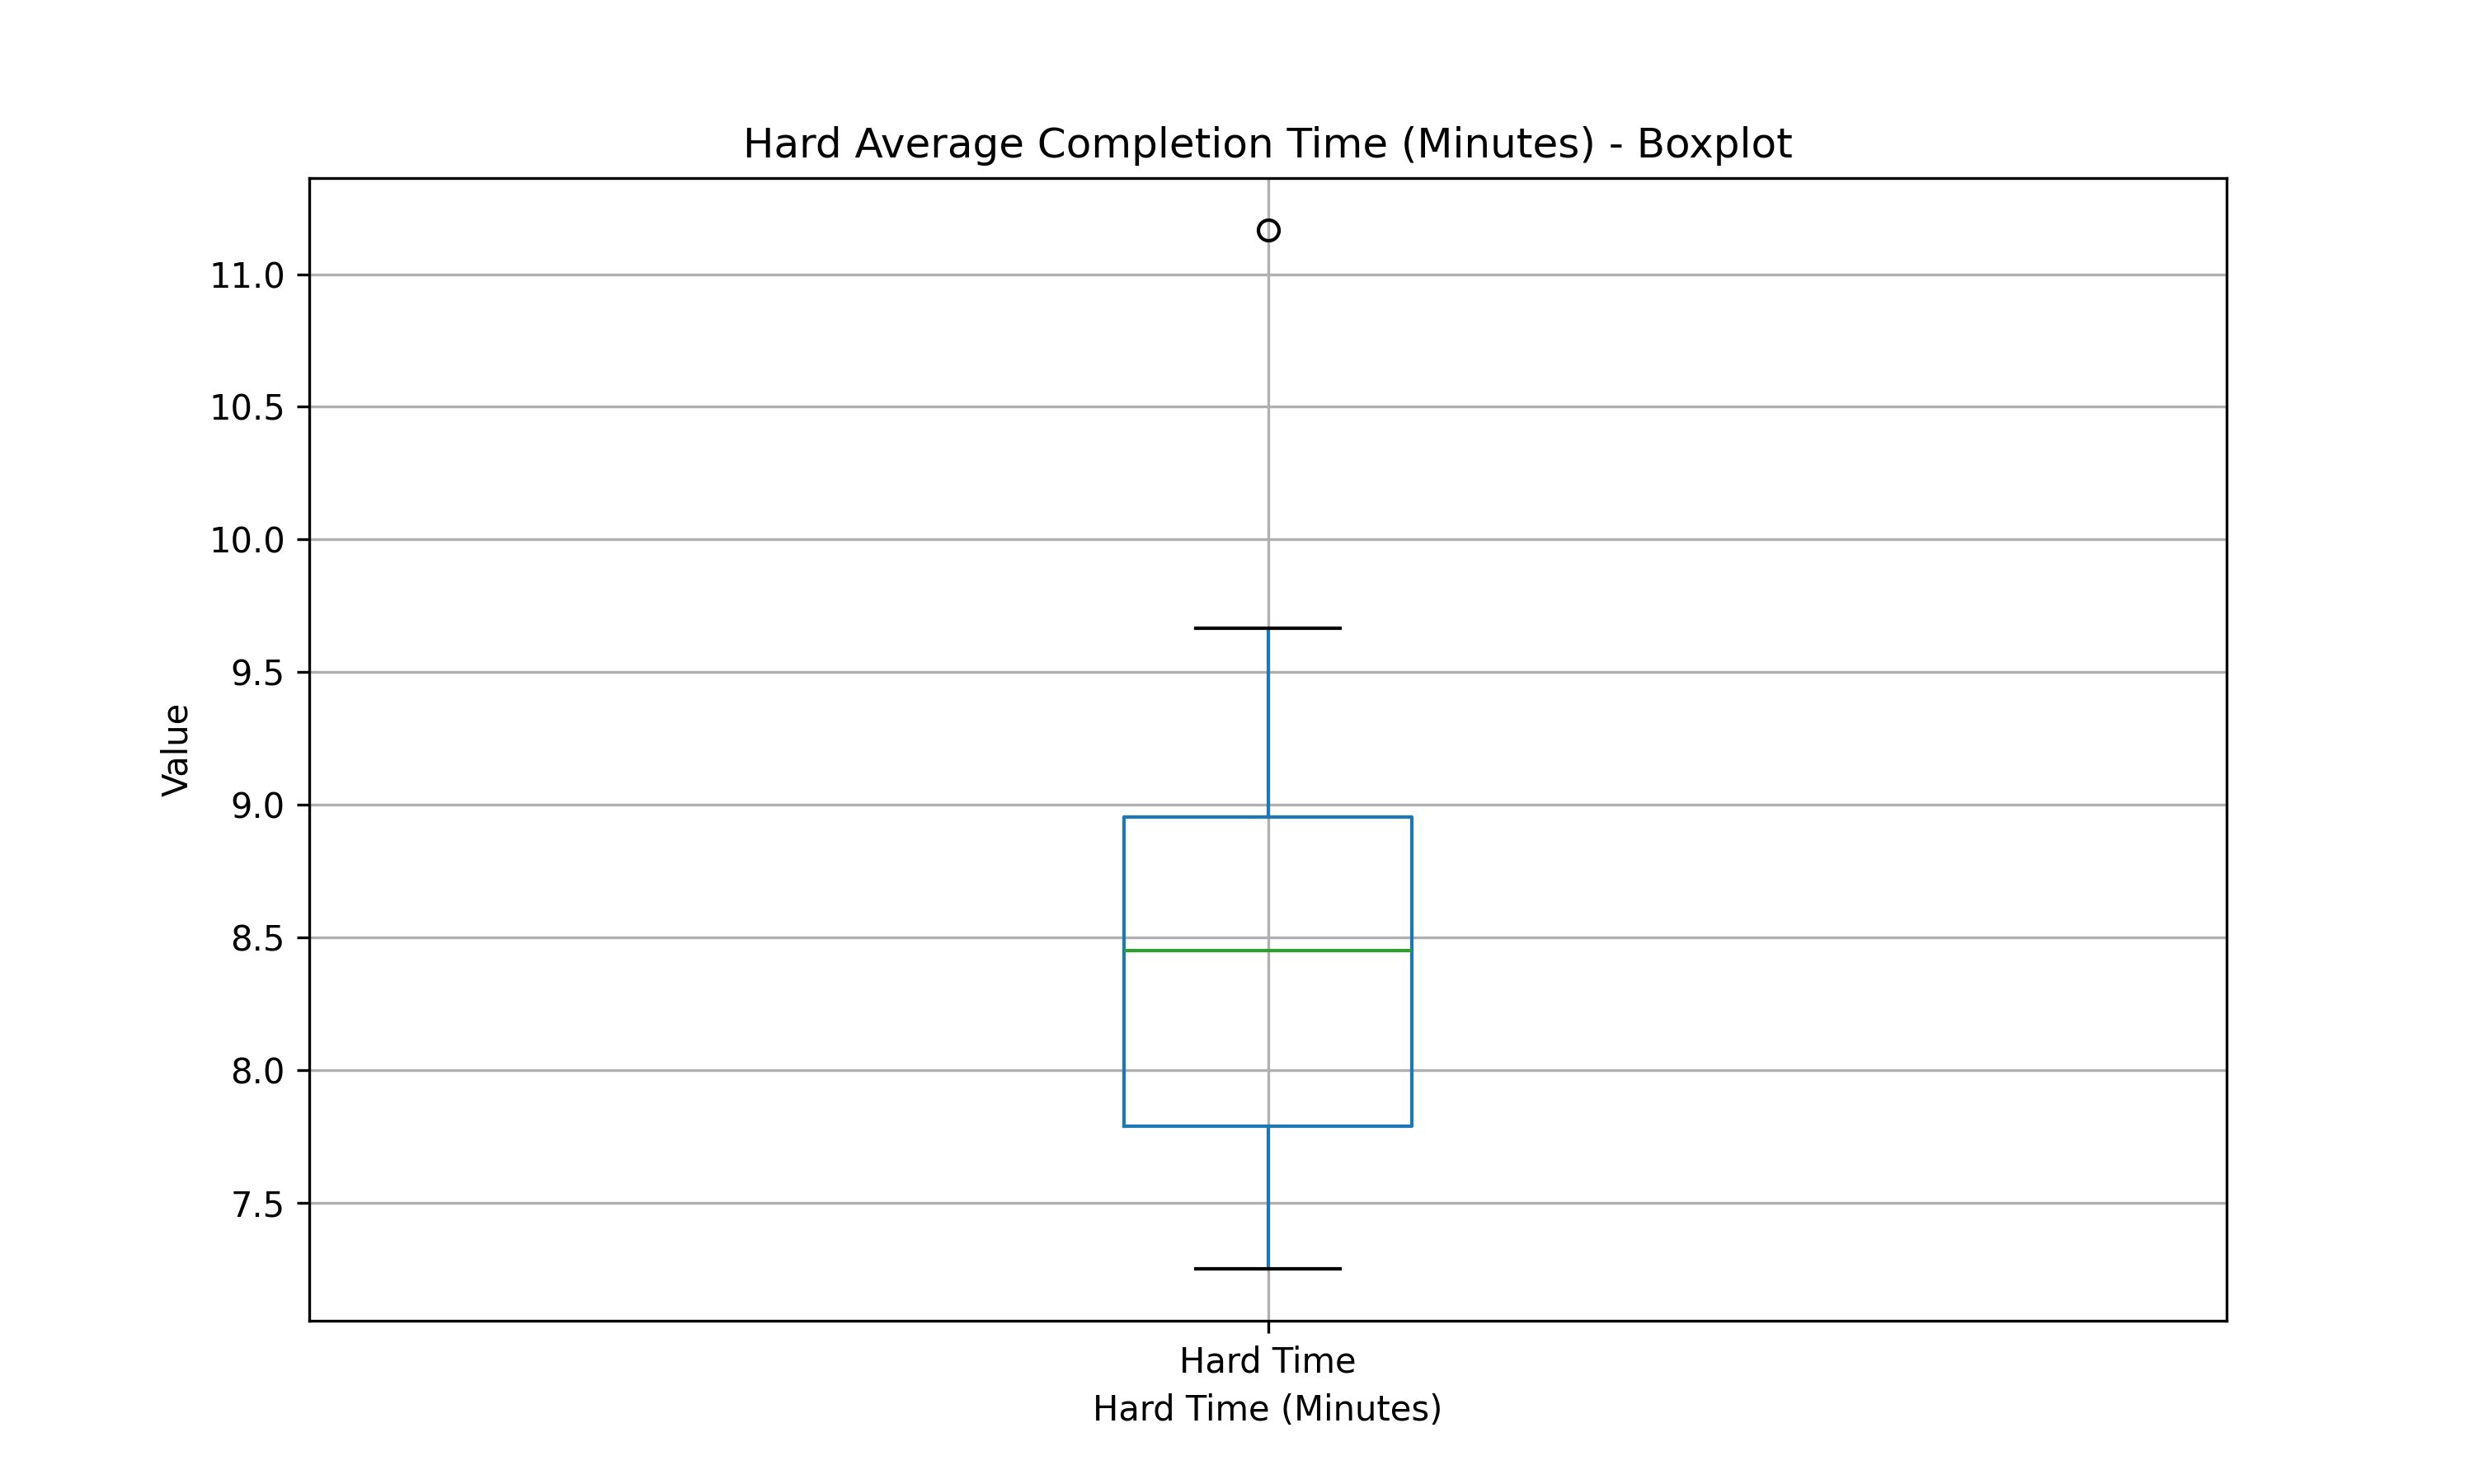

## Hypothesis 1 - Easy vs Hard Win Rate Comparison

To test whether there is a statistically significant difference in win rates between easy and hard Sudoku puzzles, an independent t-test was conducted.

- **H₀:** The mean win rates for easy and hard puzzles are equal.
- **H₁:** The mean win rates for easy and hard puzzles are different.

### Method:
An independent **t-test** was performed to compare the win rates of easy and hard puzzles. The t-statistic and p-value were calculated to test whether the difference in win rates was statistically significant.

### Result:
- **t-statistic**: 31.337
- **p-value**: 0.0
- **Conclusion**: Since the p-value is much smaller than the significance level of 0.05, we reject the null hypothesis. Therefore, we conclude that there is a statistically significant difference between the win rates of easy and hard puzzles.

### Visualization:


In [ ]:
#hypothesis 1--- comp. of easy and hard rates
easywrates= df["Easy Win Rate (%)"]
hardwrates=df["Hard Win Rate (%)"]

#t-test
t_num, p_value = ttest_ind(easywrates, hardwrates, equal_var=False)

print("Hypothesis 1 - Easy vs Hard Win Rate Comparison")
print("t statistic: " + str(round(t_num, 3)))
print("p-value: " + str(round(p_value,3)))

#results
if p_value<0.05:
  print("Conclusion: There is a statistically significant difference between the win rates (reject H0).")
else:
    print("Conclusion: No statistically significant difference found (fail to reject H0).")


**Bar Chart Comparing Easy vs Hard Win Rates:**

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(df["Date"], df["Easy Win Rate (%)"], label="Easy Win Rate",alpha=0.7)
plt.bar(df["Date"], df["Hard Win Rate (%)"], label="Hard Win Rate", alpha=0.7)

plt.title("Easy vs Hard Win Rates")
plt.xlabel("Date")
plt.ylabel("Win Rate (%)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.savefig("bar_chart.png", dpi=300)
plt.show()

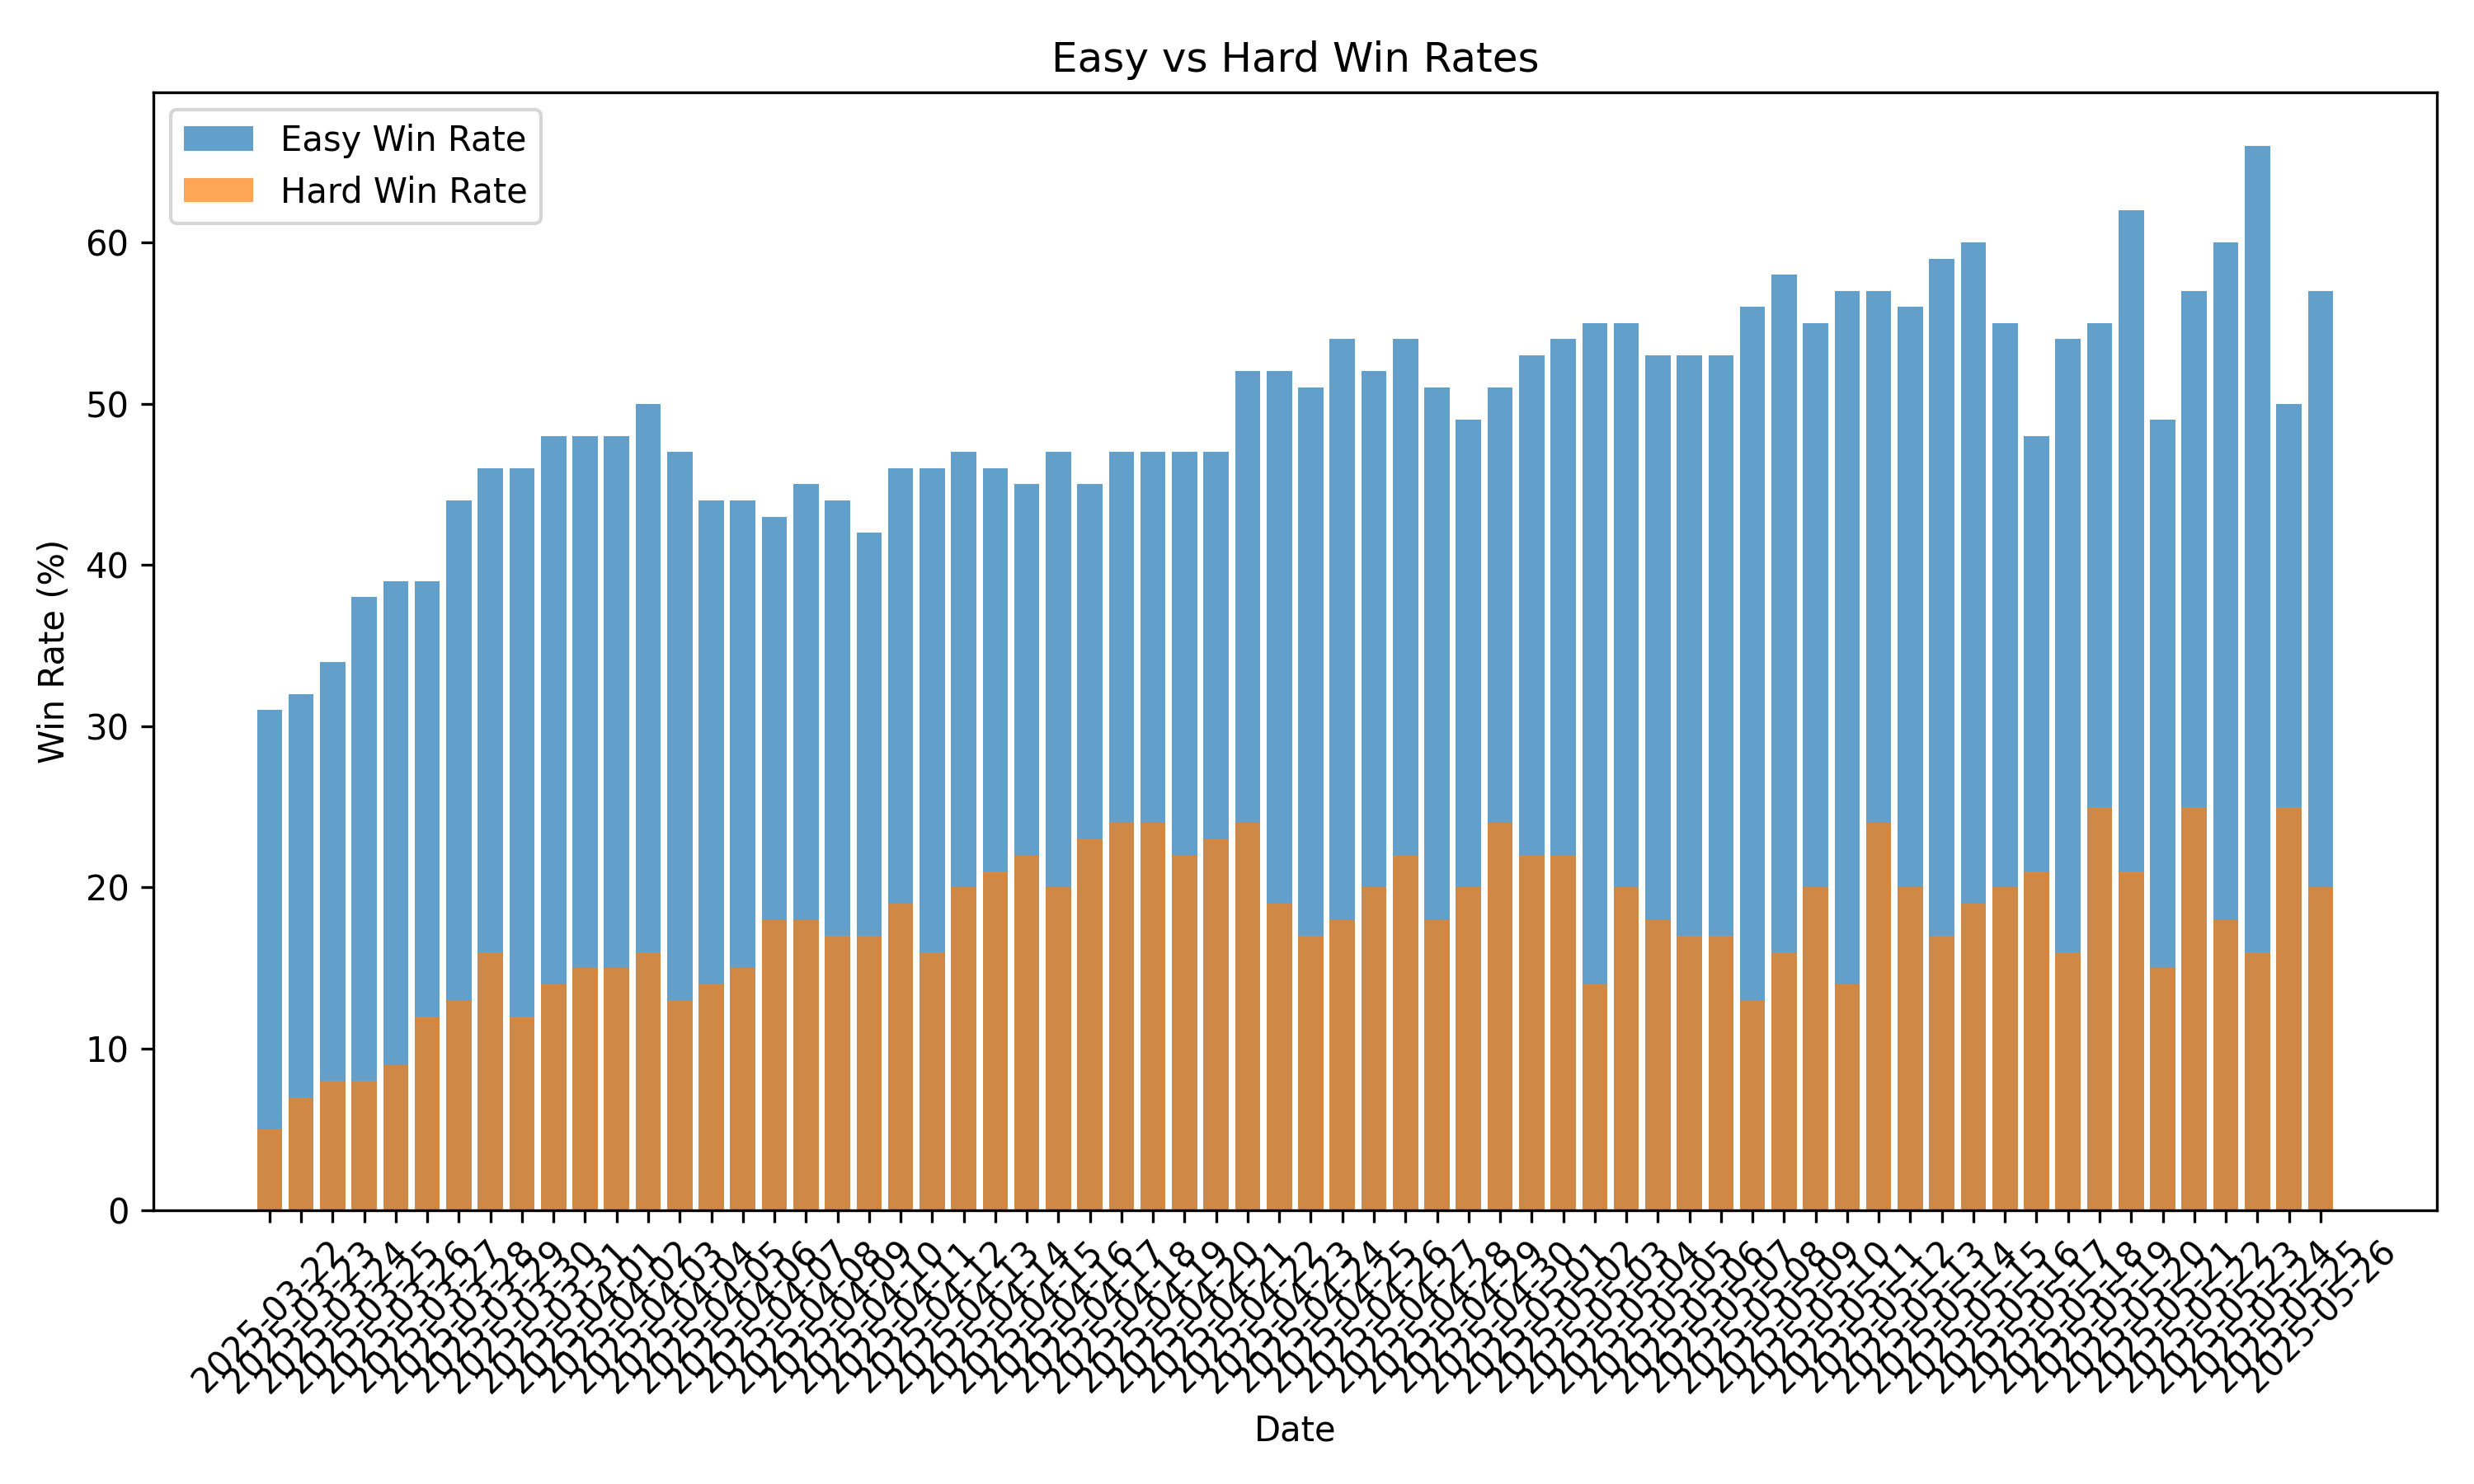

## Hypothesis 2 - Trend Analysis of Win Rates Over Time

This hypothesis tests if the win rate improves over time for both easy and hard puzzles. A linear regression model was used to examine the trend in win rates over time.

- **H₀:** There is no trend in win rate over time.
- **H₁:** There is a positive trend in win rate over time.

### Method:
Linear regression was performed to test if there is a significant trend in win rates over time for both easy and hard levels. The **slope** and **p-value** were used to determine the strength and significance of the trend.

### Result:
- **Easy Level**:
    - **Slope**: 0.303
    - **p-value**: 0.0
    - **Conclusion (Easy)**: There is a statistically significant increasing trend in win rate over time.
  
- **Hard Level**:
    - **Slope**: 0.133
    - **p-value**: 0.0
    - **Conclusion (Hard)**: There is a statistically significant increasing trend in win rate over time.

### Visualization:

In [ ]:

# Tarihi datetime formatına çevir
df["Date"] = pd.to_datetime(df["Date"])

# Gün cinsinden indeks oluştur
df["DayIndex"] = (df["Date"] - df["Date"].min()).dt.days

# regression
slope_easy, intercept_easy, r_value_easy, p_value_easy, std_err_easy = linregress(df["DayIndex"], df["Easy Win Rate (%)"])
slope_hard, intercept_hard, r_value_hard, p_value_hard, std_err_hard = linregress(df["DayIndex"], df["Hard Win Rate (%)"])

print("\nHypothesis 2 - Trend Analysis of Win Rates Over Time")

print("Easy Level → slope: "+ str(round(slope_easy,3)) +" → p-value: "+ str(round(p_value_easy, 5)))
if p_value_easy < 0.05:
    print("Conclusion (Easy): There is a statistically significant increasing trend in win rate over time.")
else:
    print("Conclusion (Easy): No significant trend detected over time.")

print("Hard Level → slope: " +str(round(slope_hard,3))+ " → p-value: "+ str(round(p_value_hard,5)))
if p_value_hard < 0.05:
    print("Conclusion (Hard): There is a statistically significant increasing trend in win rate over time.")
else:
    print("Conclusion (Hard): No significant trend detected over time.")

**Win Rate Trend Over Time:**

In [ ]:


#trend line-- easy
slope_easy,intercept_easy, *_ = linregress(df["DayIndex"], df["Easy Win Rate (%)"])
df["Kolay Trend"] = slope_easy * df["DayIndex"] + intercept_easy

#trend line---hard
slope_hard,intercept_hard,*_ = linregress(df["DayIndex"], df["Hard Win Rate (%)"])
df["Zor Trend"] = slope_hard * df["DayIndex"] + intercept_hard


plt.figure(figsize=(10, 6))

plt.plot(df["DayIndex"], df["Easy Win Rate (%)"], label="Easy Win Rate", marker='o')
plt.plot(df["DayIndex"], df["Kolay Trend"], linestyle='--', label="Easy Trend")
plt.plot(df["DayIndex"], df["Hard Win Rate (%)"], label="Hard Win Rate", marker='s')
plt.plot(df["DayIndex"], df["Zor Trend"], linestyle='--', label="Hard Trend")

plt.title("Win Rate Trend Over Time")
plt.xlabel("Day")
plt.ylabel("Win Rate(%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("trend_plot.png", dpi=300)
plt.show()

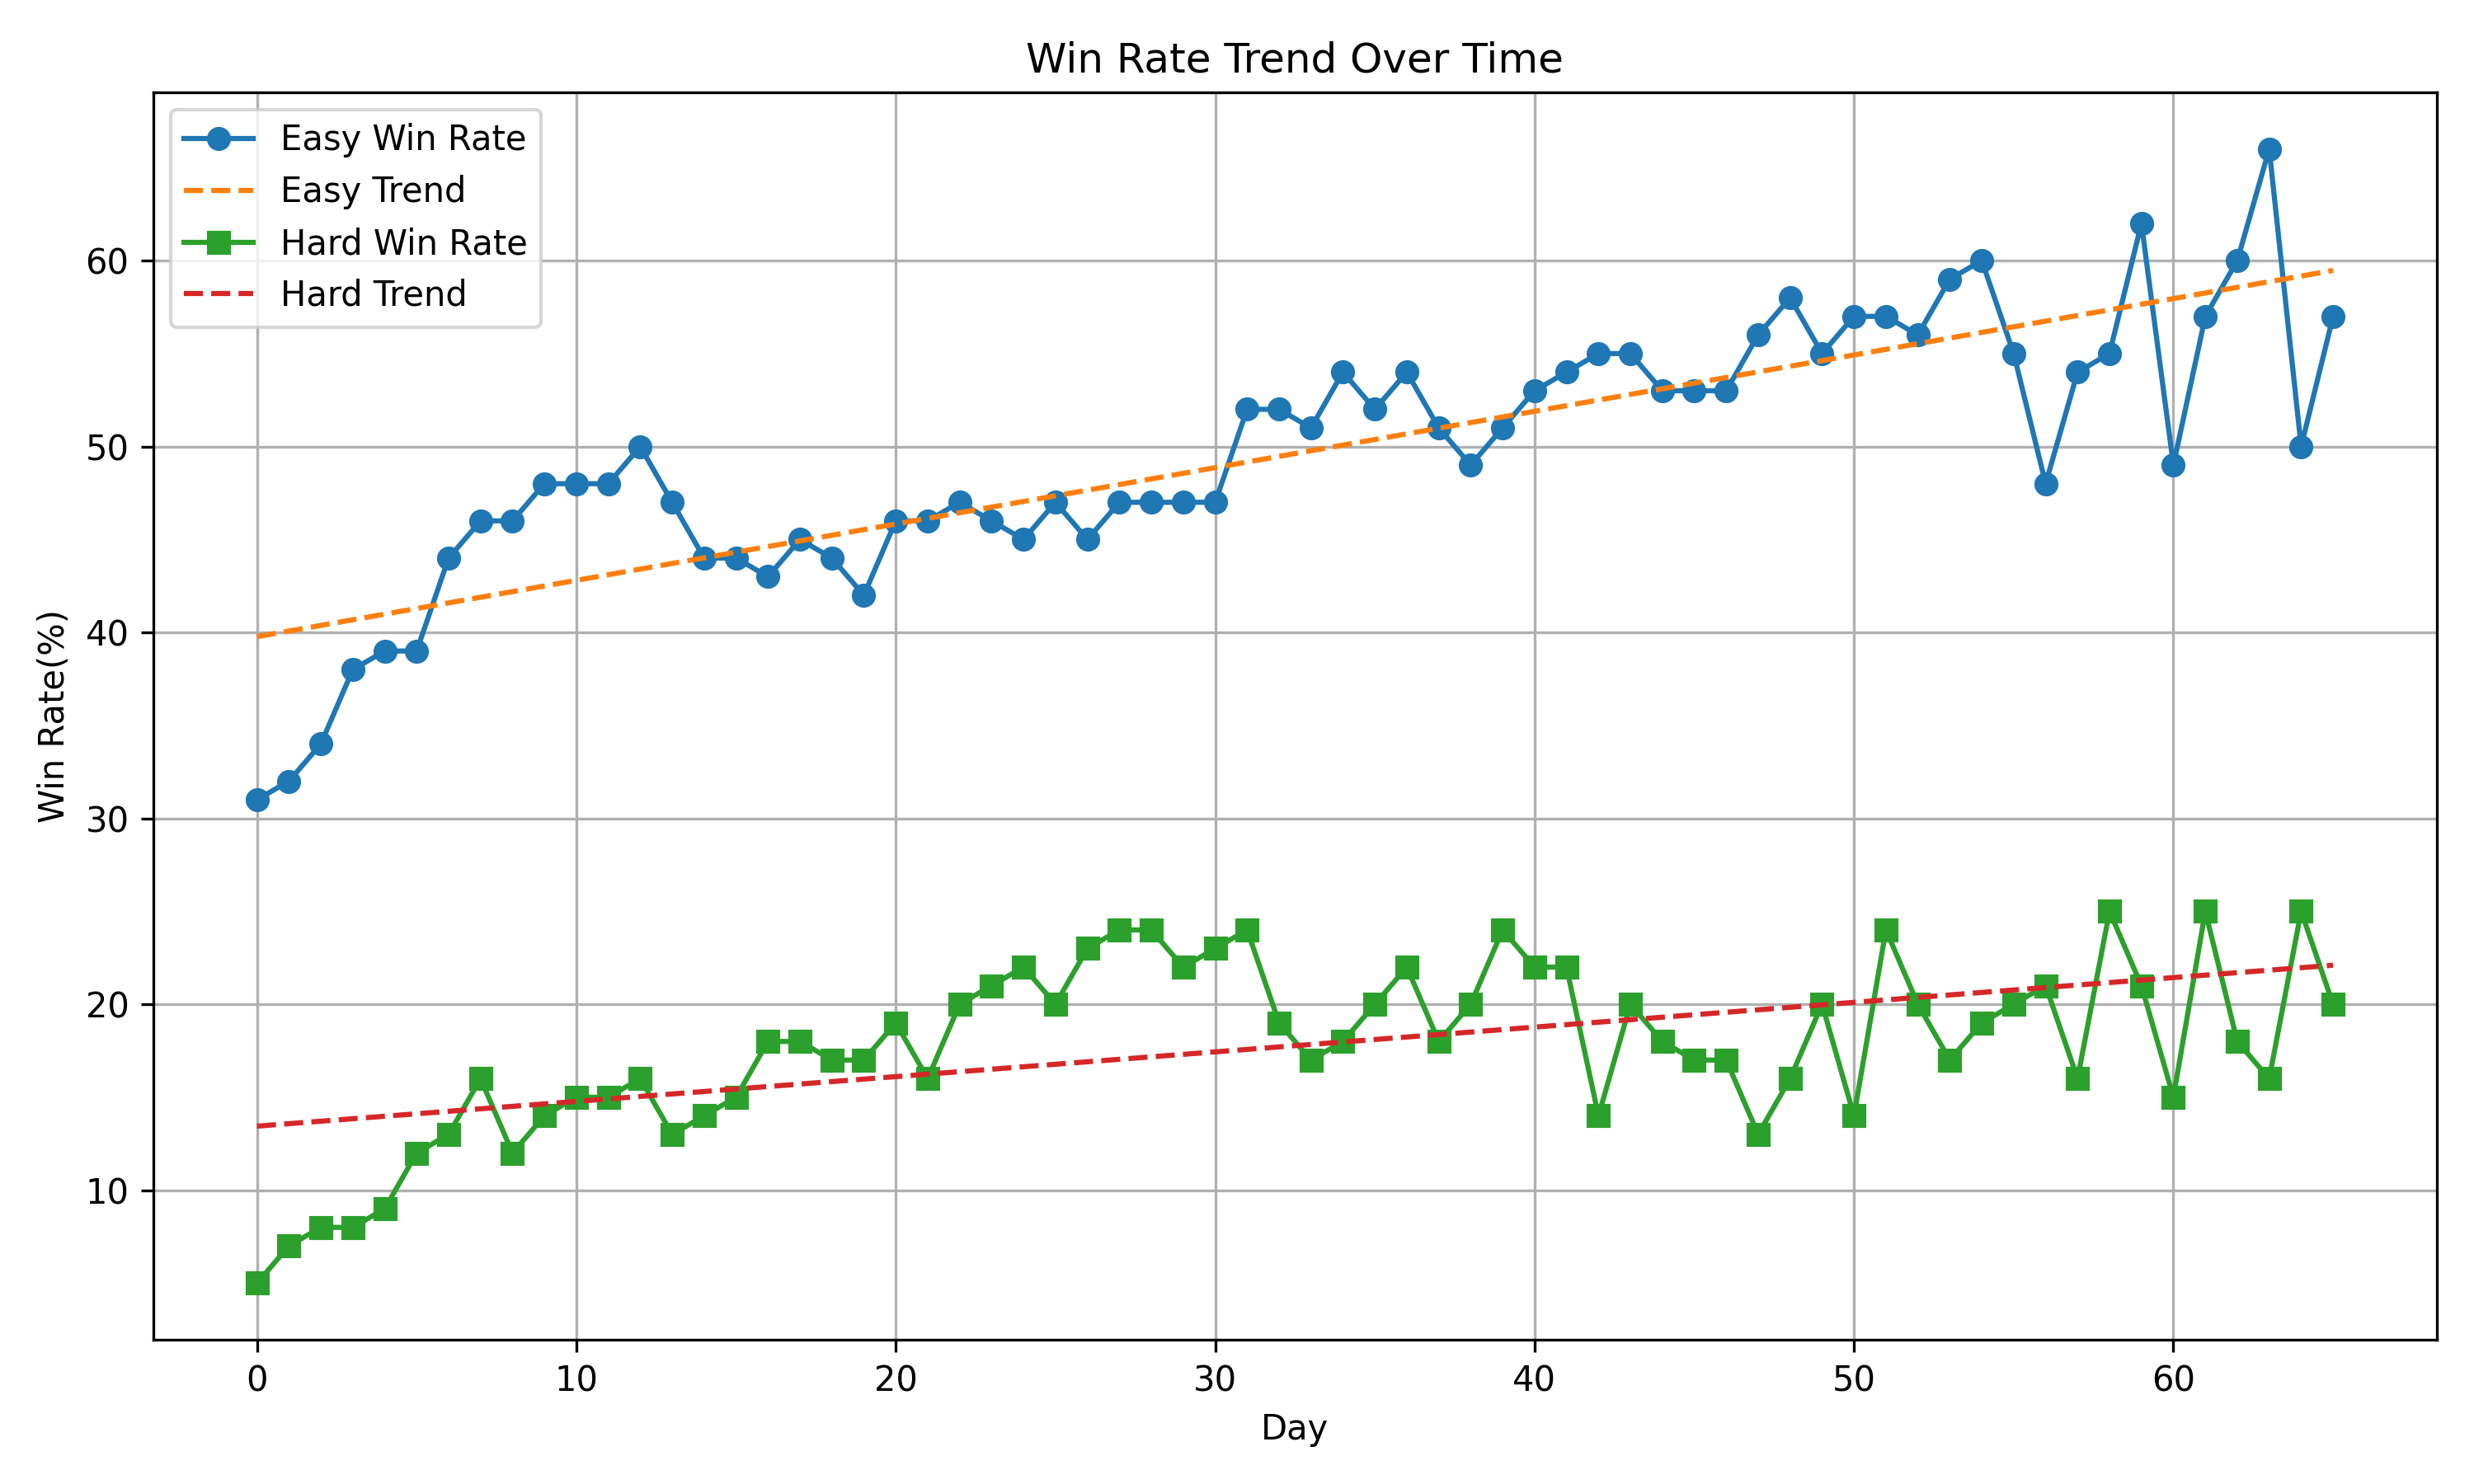

## Hypothesis 3 - Correlation Between Completion Time and Win Rate

### Hypothesis:
- **H₀:** There is no correlation between completion time and win rate.
- **H₁:** There is a significant correlation between completion time and win rate.

### Method:
Pearson correlation was calculated to analyze the relationship between completion time and win rate for both easy and hard puzzles. The **correlation coefficient** and **p-value** were used to assess the strength and significance of the relationship.

### Result:
- **Easy Level**:
    - **Correlation**: -0.823
    - **p-value**: 0.0
    - **Conclusion (Easy)**: No significant relationship detected.
  
- **Hard Level**:
    - **Correlation**: -0.491
    - **p-value**: 0.00005
    - **Conclusion (Hard)**: No significant relationship detected.

### Visualization:

In [ ]:
corr_easy, p_easy = pearsonr(df["Easy Time"], df["Easy Win Rate (%)"])
corr_hard, p_hard = pearsonr(df["Hard Time"], df["Hard Win Rate (%)"])

print("\nHypothesis 3 - Correlation Between Completion Time and Win Rate")

print("Easy Level → correlation: " + str(round(corr_easy,3)) +" → p-value: " + str(round(p_easy,5)))
if p_easy < 0.05:
    print("Conclusion (Easy): There is a statistically significant relationship between completion time and win rate.")
else:
    print("Conclusion (Easy): No significant relationship detected.")

print("Hard Level → correlation: " + str(round(corr_hard,3)) +" → p-value: " + str(round(p_hard,5)))
if p_hard < 0.05:
    print("Conclusion (Hard): There is a statistically significant relationship between completion time and win rate.")
else:
    print("Conclusion (Hard): No significant relationship detected.")

**Completion Time vs Win Rate Correlation:**

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Easy Time"], df["Easy Win Rate (%)"], label="Easy", alpha=0.7)
plt.scatter(df["Hard Time"], df["Hard Win Rate (%)"], label="Hard", alpha=0.7)


plt.title("Completion Time vs Win Rate")
plt.xlabel("Completion Time (minutes)")
plt.ylabel("Win Rate (%)")
plt.legend()
plt.tight_layout()

plt.savefig("scatter_plot.png", dpi=300)
plt.show()

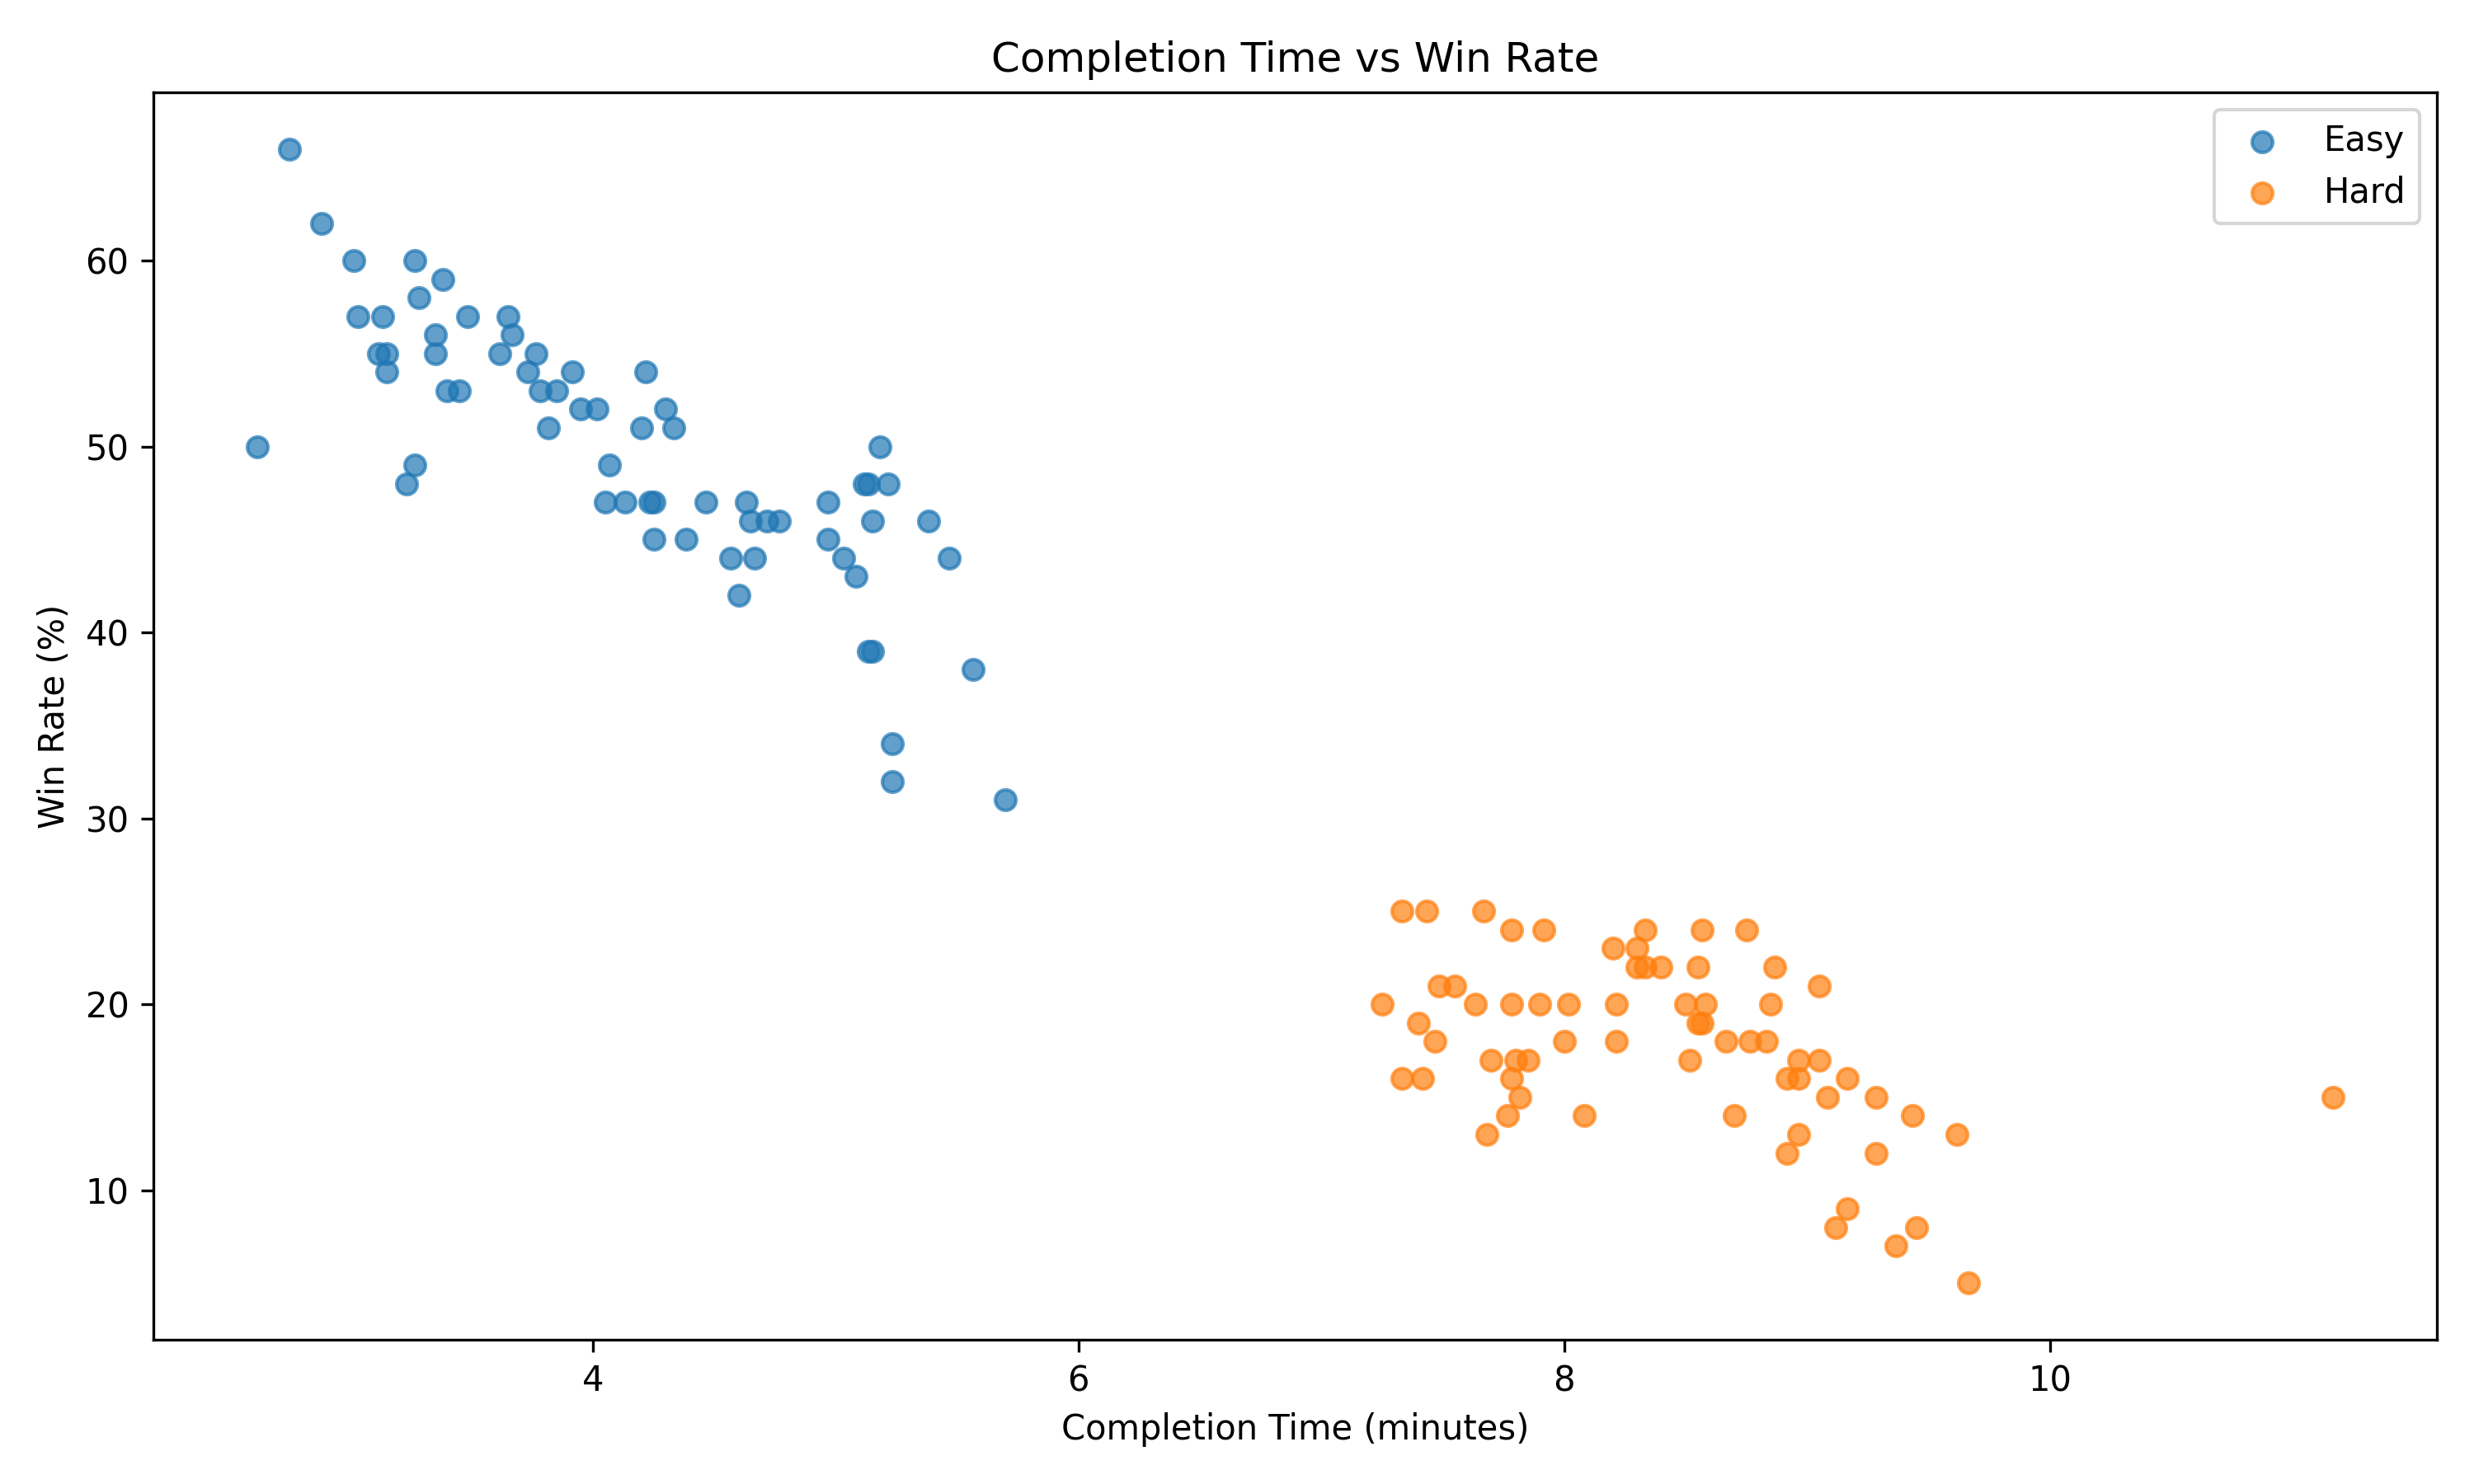

## Results and Discussion

- **Hypothesis 1**: The t-test confirmed that there is a statistically significant difference between the win rates of easy and hard puzzles, with the easy puzzles having a higher win rate.
  
- **Hypothesis 2**: Both easy and hard puzzles showed a statistically significant increasing trend in win rates over time, suggesting that performance improves over time.

- **Hypothesis 3**: The analysis shows a statistically significant negative correlation between completion time and win rate for both difficulty levels. For easy puzzles, the correlation is strong (r = -0.823), indicating that players who solve puzzles more quickly are much more likely to win. For hard puzzles, the relationship is moderate (r = -0.491) but still significant, suggesting that faster completion is associated with higher success, though other factors may also influence outcomes in more complex games.
.

##Machine Learning Analysis | Predicting Easy-Level Completion Time

In this section, I built a regression model to predict how long it takes a player to complete a easy-level Sudoku puzzle using their performance indicators. The aim was to investigate whether a player’s success and experience at easier difficulty levels can explain their typical solving speed.

###Features Used:
We selected the following variables as predictors:

**Easy Win Rate (%):** Measures the player's overall success at the easy level. A higher win rate may reflect greater strategic skill.

**Easy Game Counts:** Represents experience and familiarity with easy puzzles.

**Easy Win Streak:** Indicates recent momentum and potential performance peaks.

**The target variable was:**

**Average Completion Time (minutes)** for easy puzzles, converted from mm:ss format to float.

###Method:
I preprocessed the data by converting all time-related and performance variables into numeric formats. After cleaning the dataset and removing any missing or malformed values, I split the data into training and testing subsets using an 80/20 ratio.

I then trained a **Linear Regression Model** using the selected features and evaluated its predictive performance using two metrics:

**Mean Squared Error (MSE):** Represents the average squared difference between predicted and actual values.

**R-squared (R²):** Indicates how much of the variance in completion time is explained by the model.

###Results:
**R² = 0.73** → This means the model explains approximately 73% of the variance in completion time.

**MSE = 0.24** → Indicates low average prediction error.

These results suggest that a player's win rate, experience, and streaks are meaningful predictors of how fast they solve easy puzzles.

###Interpretation:
As expected, players who perform better tend to finish puzzles more quickly. This reinforces the idea that familiarity and confidence lead to more efficient solving, even when using simple statistical models.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

df["Easy Avg Time (min, float)"] = df["Easy Avg Time (min)"].apply(zamanduzelt)

# converting to numeric form
converting = ["Easy Win Rate (%)", "Easy Game Count", "Easy Win Streak"]
for col in converting:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# defining features and target
X = df[["Easy Win Rate (%)", "Easy Game Count", "Easy Win Streak"]]
y = df["Easy Avg Time (min, float)"]

# test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# trainin model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

#results
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Avg Completion Time (min)")
plt.ylabel("Predicted Avg Completion Time (min)")
plt.title("Actual vs Predicted - Easy Level")
plt.grid(True)
plt.tight_layout()
plt.savefig("predicted_plot.png", dpi=300)
plt.show()


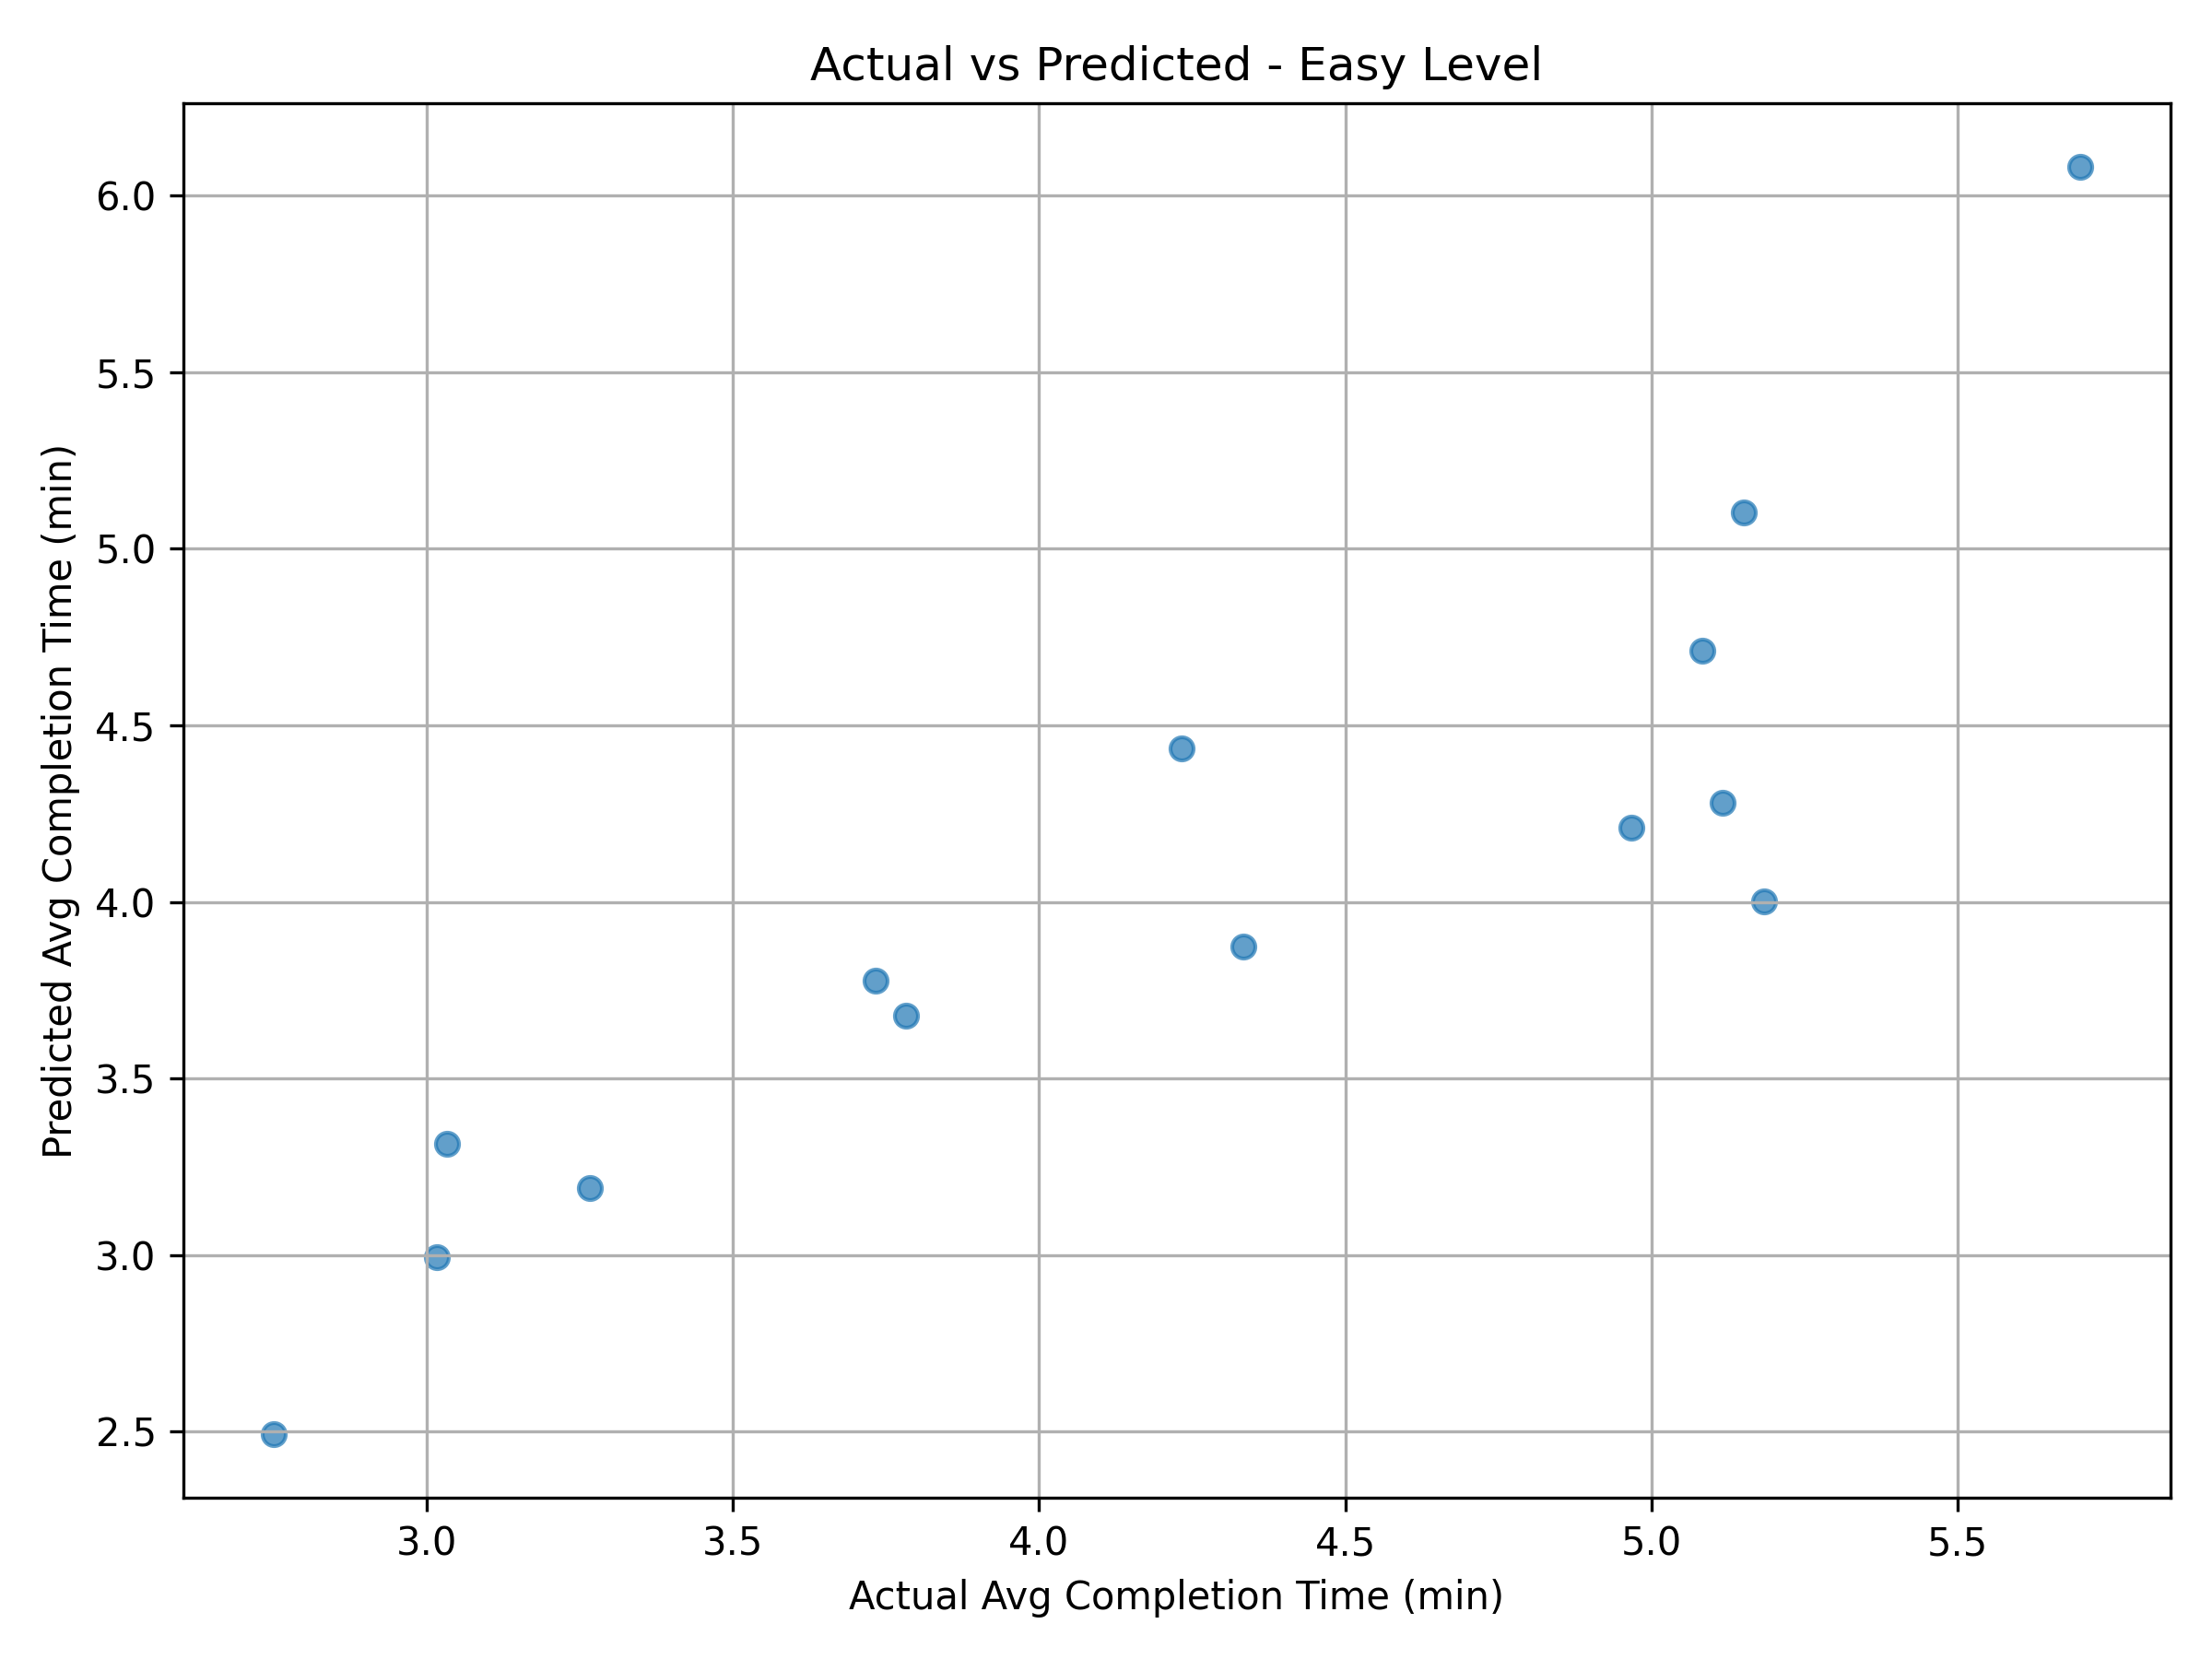

##Threshold Detection | Predicting Success Based on Completion Time##

In this section, we examined whether a player's completion time could be used to classify success or failure on easy-level Sudoku puzzles. The idea was to find a **critical time threshold that** separates winners from non-winners based on their speed.

###Method:###
We approached this as a binary classification problem:

Completion time was converted from mm:ss to float minutes.

Win performance was labeled as 1 if Easy Win Rate ≥ 45%, otherwise 0.

Using these labels and times, we generated a **ROC Curve** by comparing the model's true positive and false positive rates across different thresholds.

###Results:###
**Best Time Threshold:** 4.47 minutes

**AUC Score:** 0.91

This means players who complete puzzles in under 4.5 minutes have a significantly higher chance of achieving a win rate above 45%.

###Interpretation:###
The ROC curve clearly shows that **completion time** is a strong predictor of success. The analysis revealed a statistically optimal cutoff: players solving puzzles faster than 4.47 minutes are far more likely to succeed.
This insight can be used to guide players toward effective time targets or integrated into adaptive difficulty systems in puzzle games.

In [2]:
from sklearn.metrics import roc_curve, roc_auc_score


df["Easy Time (min)"] = df["Easy Avg Time (min)"].apply(zamanduzelt)
df["Easy Win Rate (%)"] = pd.to_numeric(df["Easy Win Rate (%)"], errors="coerce")

# kazanma başarısını binary sınıfa çevir-- eşik=45
threshold_rate = 45
df["Win (binary)"] = (df["Easy Win Rate (%)"] >= threshold_rate).astype(int)

# NaN'leri temizle
df_clean = df.dropna(subset=["Easy Time (min)", "Win (binary)"])

# ROCeğrisi
fpr, tpr, thresholds = roc_curve(df_clean["Win (binary)"], -df_clean["Easy Time (min)"])  # Süre azaldıkça başarı artıyor

# eşik: Youden's J = tpr - fpr
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
best_threshold = thresholds[best_idx]

#results
print(f"Best threshold (minutes): {round(-best_threshold, 2)}")
print(f"AUC score: {roc_auc_score(df_clean['Win (binary)'], -df_clean['Easy Time (min)']):.2f}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="ROC Curve", color='blue')
plt.scatter(fpr[best_idx], tpr[best_idx], color='red', label=f"Best Threshold: {round(-best_threshold,2)} min")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Predicting Win from Completion Time")
plt.legend()
plt.grid(True)
plt.savefig("rocesik.png", dpi=300)
plt.show()


NameError: name 'df' is not defined

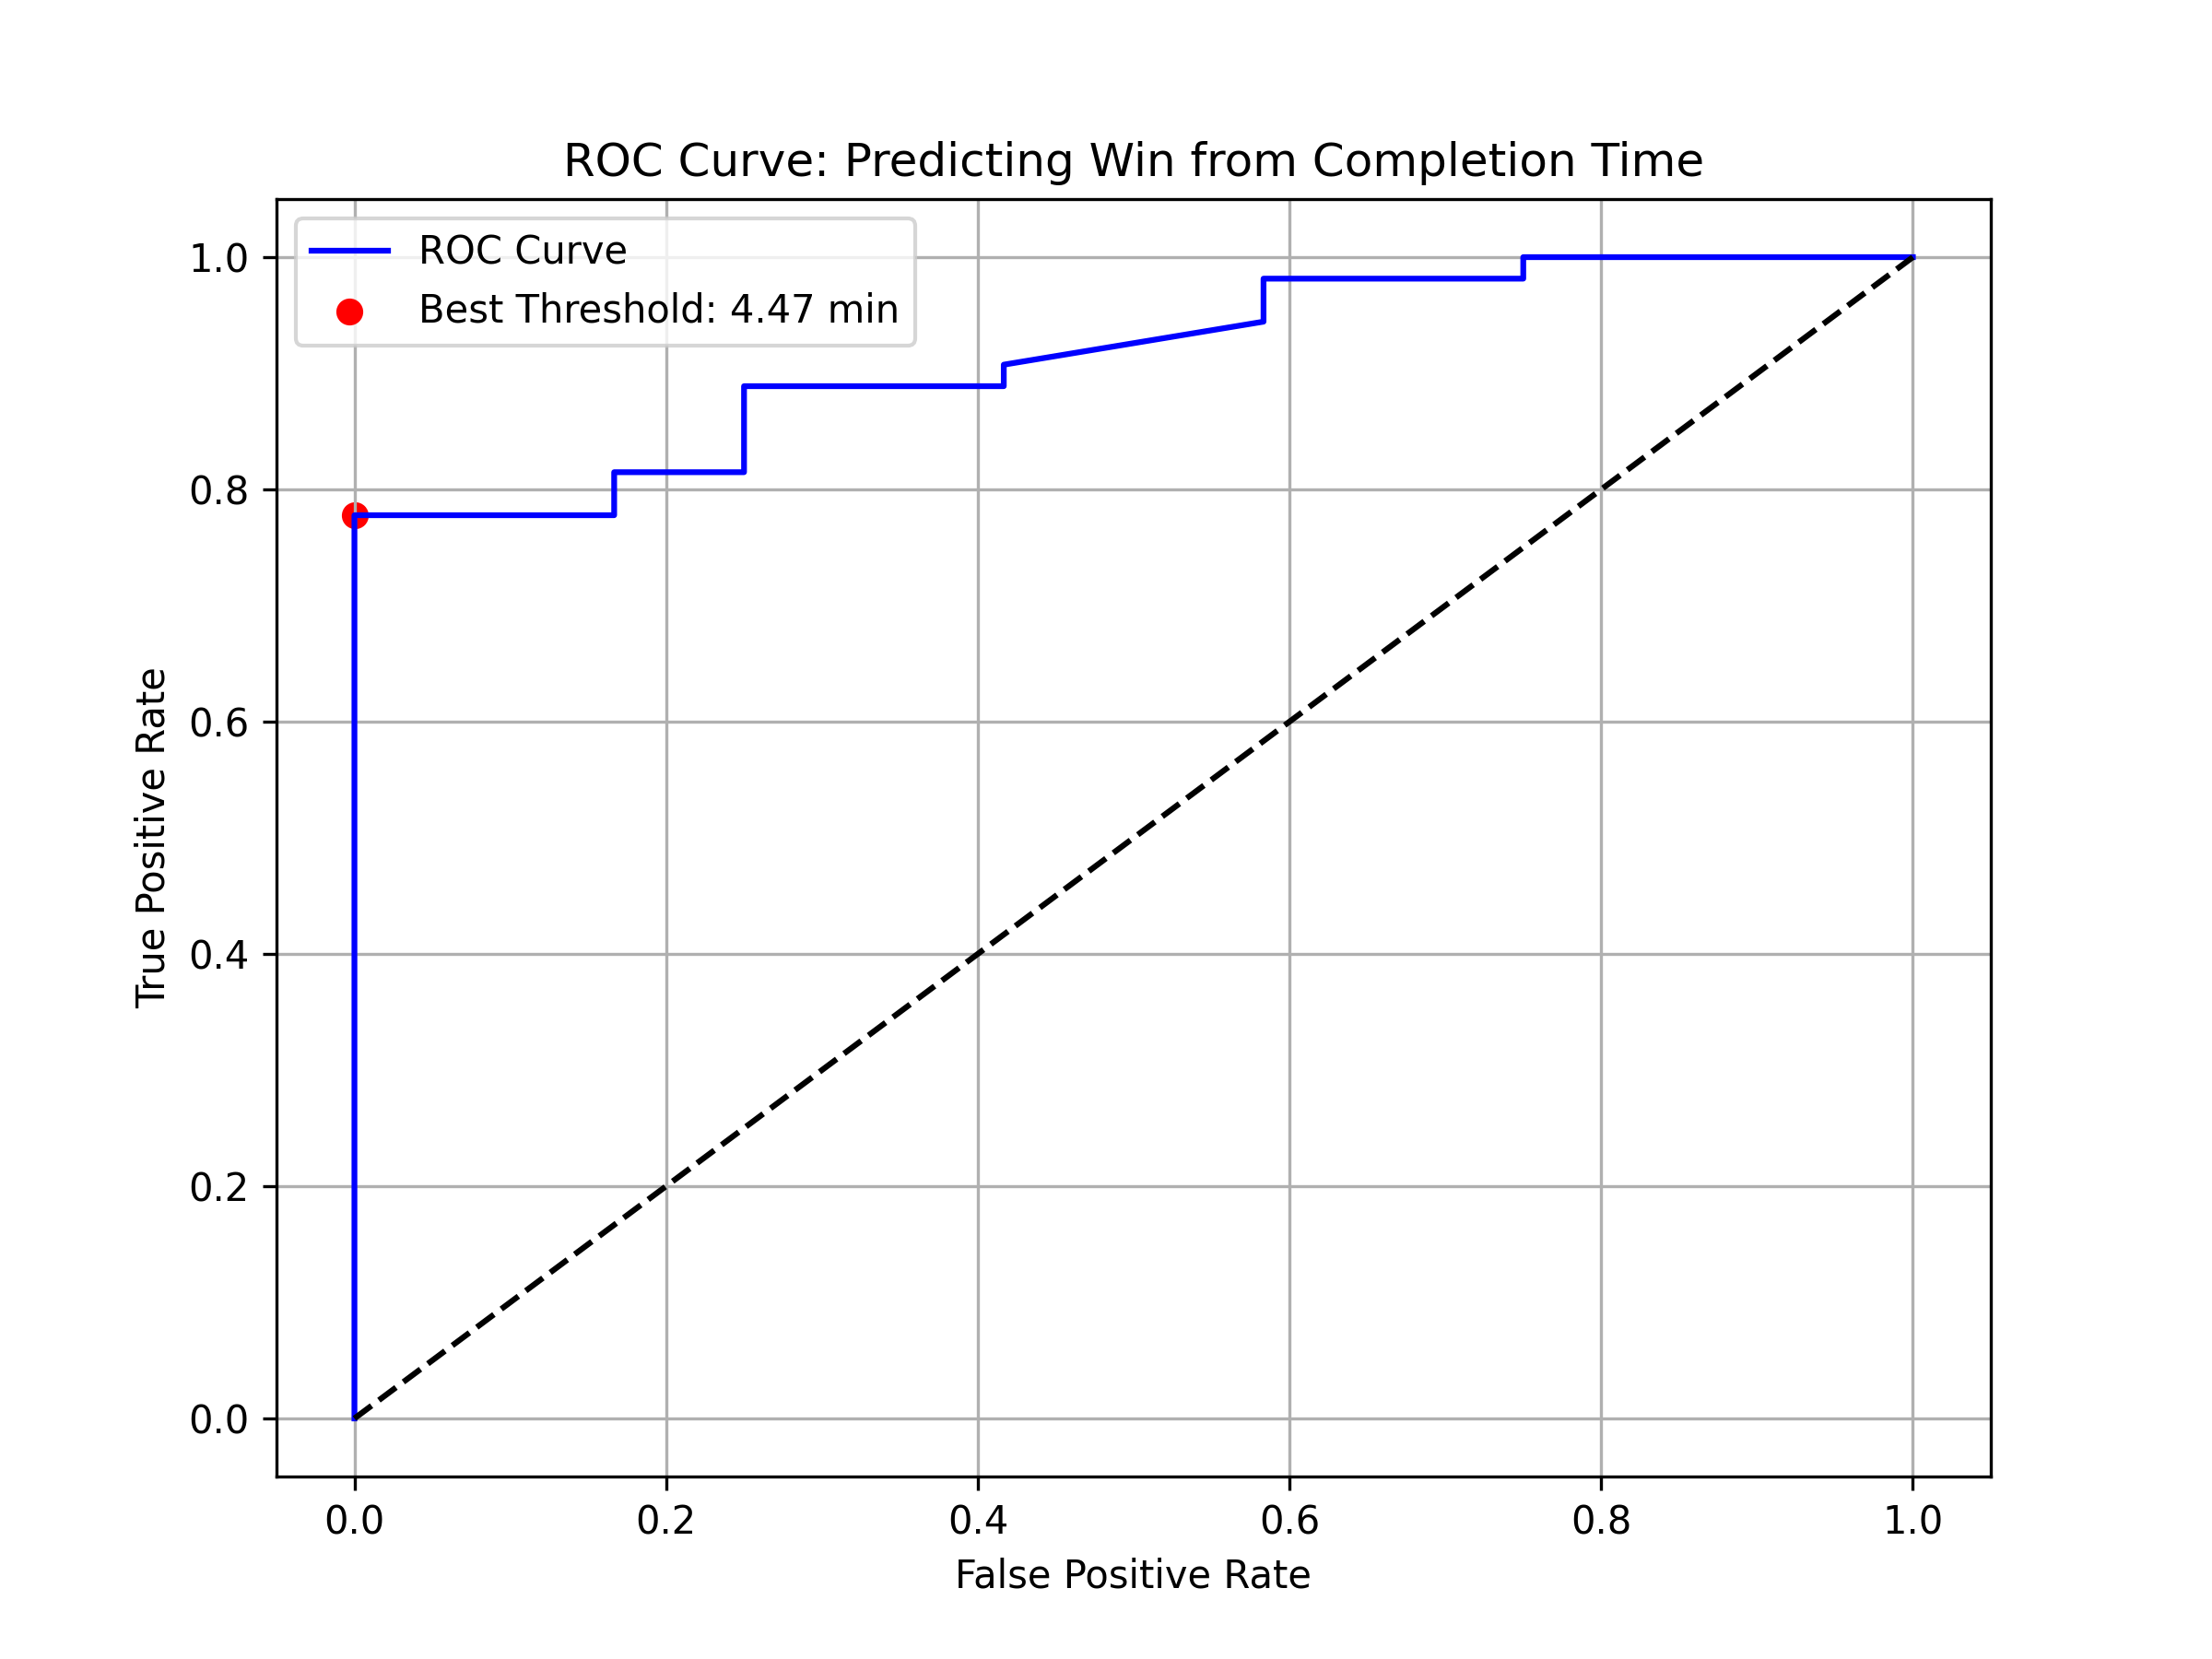

##Final Report

In this project, I analyzed personal Sudoku performance data to understand how completion time and success metrics relate. First, a classification analysis identified a critical threshold of **4.47 minutes**, under which players were far more likely to have a win rate ≥ 45% (AUC = 0.91). Then, using features like win rate, game count, and win streak, a **linear regression model** predicted average completion time with **R² = 0.73**, showing strong explanatory power. Together, these findings highlight that both speed and success patterns are strong indicators of player performance.

---

###Future Work

- Apply models to hard-level puzzles and larger datasets.   
- Use insights for personalized feedback or adaptive puzzle difficulty.  
- Investigate time-based fatigue or time-of-day effects on performance.
